# Exploring and Processing Data

In [48]:
# Imports 
import pandas as pd
import numpy as np
import os

## Import Data

In [54]:
!ls

DellGSPE_DSrole_dataset.csv
DellGSPE_DSrole_intro.docx
Untitled.ipynb


In [59]:
# read the data with all default parameters
df = pd.read_csv('DellGSPE_DSrole_dataset.csv', index_col='asst_id')

In [60]:
# get the type
type(df)

pandas.core.frame.DataFrame

## Basic Structure

In [61]:
# use .info() to get brief information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 16664
Data columns (total 18 columns):
product_type           99980 non-null object
mnfture_wk             100000 non-null int64
contract_st            100000 non-null int64
contract_end           100000 non-null int64
contact_wk             100000 non-null int64
contact_type           99986 non-null object
issue_type             85958 non-null object
topic_category         66916 non-null object
parts_sent             54566 non-null object
repair_type            100000 non-null object
repeat_ct              100000 non-null int64
parts_ct               100000 non-null int64
agent_tenure_indays    99986 non-null float64
contact_manager_flg    100000 non-null int64
diagnostics            100000 non-null object
repeat_parts_sent      13346 non-null object
region                 99997 non-null object
country                89998 non-null object
dtypes: float64(1), int64(7), object(10)
memory usage: 14.5+ MB


In [62]:
# get top 5 rows
df.head()

,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
asst_id,,,,,,,,,,,,,,,,,,
0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [63]:
# get last 5 rows
df.tail()

,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
asst_id,,,,,,,,,,,,,,,,,,
16660,Laptops,201630,201630,201930,201840,VOICE,Information Status,Booting,NaN,Soft,0,0,1978.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
16661,Laptops,201718,201718,202122,201840,Voice,NaN,NaN,"LCD Panel, Chassis(2)",Hard,0,3,1018.0,0,Not_USED,Chassis,Hogwarts,Zonko's Joke Shop
16662,Desktops,201607,201607,202107,201840,VOICE,Information Status,Power,NaN,Soft,0,0,305.0,0,Not_USED,NaN,Milky Way,Merope
16663,Laptops,201552,201552,202352,201840,CHAT,"Audio, Video, Speakers, TV Tuner",LCD/Monitor,"LCD Panel, Cables",Hard,0,2,323.0,0,InEffective_Usage,NaN,Hogwarts,Zonko's Joke Shop
16664,Desktops,201719,201719,202018,201840,Voice,NaN,NaN,"Motherboard, LCD Panel",Hard,1,2,1018.0,0,Not_USED,"Motherboard, Documentation",Hogwarts,Zonko's Joke Shop


In [66]:
# column selection
df.product_type.unique()

array(['Laptops', 'Desktops', 'Other Electronics', nan], dtype=object)

In [71]:
# columns selections
df[['product_type', 'repeat_ct']].head()

,product_type,repeat_ct
asst_id,,
0,Laptops,0
1,Laptops,0
2,Laptops,0
3,Laptops,0
4,Laptops,0


In [75]:
# select discrete columns 
df.loc[:,['repeat_ct', 'parts_ct','agent_tenure_indays', 'contact_manager_flg', 'contact_type']].head()

,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,contact_type
asst_id,,,,,
0,0,3,1018.0,0,Voice
1,0,2,1018.0,0,Voice
2,0,1,1018.0,0,Voice
3,0,1,298.0,0,VOICE
4,0,1,1018.0,0,Voice


In [79]:
# filter rows based on the condition
laptops_df = df.loc[df.product_type=='Laptops',:]
laptops_df.head()

,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
asst_id,,,,,,,,,,,,,,,,,,
0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [82]:
# filter based on some complex logic
laptops_repair_type_hard_df = df.loc[(df.product_type=='Laptops') & (df.repair_type=='Hard'),:]
laptops_repair_type_hard_df.head()

,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
asst_id,,,,,,,,,,,,,,,,,,
0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [85]:
laptops_repair_type_hard_df.describe()

,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,45897.000000,45897.000000,45897.000000,45897.0,45897.000000,45897.000000,45897.000000,45897.000000
mean,201690.656535,201690.190230,201997.433623,201840.0,0.127045,2.065451,1014.190884,0.013748
std,112.024006,114.076108,137.184934,0.0,0.334007,1.723573,913.814204,0.116445
min,201014.000000,200550.000000,201114.000000,201840.0,0.000000,0.000000,221.000000,0.000000
25%,201620.000000,201620.000000,201918.000000,201840.0,0.000000,1.000000,563.000000,0.000000
50%,201718.000000,201719.000000,201949.000000,201840.0,0.000000,2.000000,879.000000,0.000000
75%,201804.000000,201804.000000,202103.000000,201840.0,0.000000,3.000000,1018.000000,0.000000
max,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.000000,8922.000000,1.000000


## Summary Statistics

In [84]:
# use .describe() to get statistics for all numeric columns
df.describe()

,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.00000,99986.000000,100000.000000
mean,201672.108910,201671.595910,201951.897740,201840.0,0.074090,1.15955,985.886844,0.012430
std,156.139692,158.940598,186.777325,0.0,0.262491,1.56942,862.044503,0.110795
min,201001.000000,200547.000000,201006.000000,201840.0,0.000000,0.00000,218.000000,0.000000
25%,201612.000000,201612.000000,201903.000000,201840.0,0.000000,0.00000,536.000000,0.000000
50%,201719.000000,201720.000000,201938.000000,201840.0,0.000000,1.00000,801.000000,0.000000
75%,201808.000000,201809.000000,202045.000000,201840.0,0.000000,2.00000,1018.000000,0.000000
max,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.00000,8922.000000,1.000000


In [89]:
# numerical feature 
# centrality measures
print("Mean Agent Tenure Indays: {0}".format(df.agent_tenure_indays.mean()))
print("Median Agent Tenure Indays: {0}".format(df.agent_tenure_indays.median()))

Mean Agent Tenure Indays: 985.8868441581822
Median Agent Tenure Indays: 801.0


In [90]:
# dispersion measures for agent_tenure_indays
print('max {}'.format(df.agent_tenure_indays.max())) # min
print('min {}'.format(df.agent_tenure_indays.min())) # max
print('Range {}'.format((df.agent_tenure_indays.max())-(df.agent_tenure_indays.min()))) # range
print('25th Perc {}'.format(df.agent_tenure_indays.quantile(0.25))) # 25 percentile
print('50th Perc {}'.format(df.agent_tenure_indays.quantile(0.5))) # 50 percentile
print('75th Perc {}'.format(df.agent_tenure_indays.quantile(0.75))) # 75 percentile
print('Variance {}'.format(df.agent_tenure_indays.var())) # variance
print('Standard Deviation {}'.format(df.agent_tenure_indays.std())) # standard deviation

max 8922.0
min 218.0
Range 8704.0
25th Perc 536.0
50th Perc 801.0
75th Perc 1018.0
Variance 743120.7248663167
Standard Deviation 862.0445028339991


In [92]:
%matplotlib inline

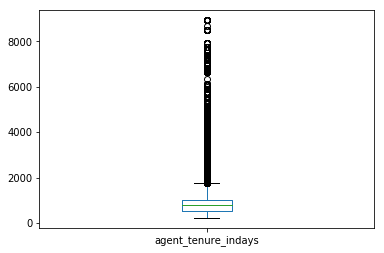

In [103]:
# box-whisker plot
df.agent_tenure_indays.plot(kind='box');

In [94]:
# use .describe(include='all') to get statistics for all columns including non-numeric ones
df.describe(include='all')

,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
count,99980,100000.000000,100000.000000,100000.000000,100000.0,99986,85958,66916,54566,100000,100000.000000,100000.00000,99986.000000,100000.000000,100000,13346,99997,89998
unique,3,NaN,NaN,NaN,NaN,5,82,63,2941,2,NaN,NaN,NaN,NaN,4,1561,3,53
top,Laptops,NaN,NaN,NaN,NaN,VOICE,System Board Components,Booting,Hard Drive,Hard,NaN,NaN,NaN,NaN,Not_USED,"Motherboard, Documentation",Hogwarts,Zonko's Joke Shop
freq,73052,NaN,NaN,NaN,NaN,69757,13076,15343,4504,59495,NaN,NaN,NaN,NaN,67465,1081,69953,62679
mean,NaN,201672.108910,201671.595910,201951.897740,201840.0,NaN,NaN,NaN,NaN,NaN,0.074090,1.15955,985.886844,0.012430,NaN,NaN,NaN,NaN
std,NaN,156.139692,158.940598,186.777325,0.0,NaN,NaN,NaN,NaN,NaN,0.262491,1.56942,862.044503,0.110795,NaN,NaN,NaN,NaN
min,NaN,201001.000000,200547.000000,201006.000000,201840.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,218.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,201612.000000,201612.000000,201903.000000,201840.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000,536.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,201719.000000,201720.000000,201938.000000,201840.0,NaN,NaN,NaN,NaN,NaN,0.000000,1.00000,801.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,201808.000000,201809.000000,202045.000000,201840.0,NaN,NaN,NaN,NaN,NaN,0.000000,2.00000,1018.000000,0.000000,NaN,NaN,NaN,NaN


In [95]:
# categorical column: Counts
df.product_type.value_counts()

Laptops              73052
Desktops             23601
Other Electronics     3327
Name: product_type, dtype: int64

In [96]:
# categorical column: Proportions
df.product_type.value_counts(normalize=True)

Laptops              0.730666
Desktops             0.236057
Other Electronics    0.033277
Name: product_type, dtype: float64

In [97]:
df.columns

Index(['product_type', 'mnfture_wk', 'contract_st', 'contract_end',
       'contact_wk', 'contact_type', 'issue_type', 'topic_category',
       'parts_sent', 'repair_type', 'repeat_ct', 'parts_ct',
       'agent_tenure_indays', 'contact_manager_flg', 'diagnostics',
       'repeat_parts_sent', 'region', 'country'],
      dtype='object')

In [98]:
# apply counts on another column such as repair_type
df.repair_type.value_counts(normalize=True)

Hard    0.59495
Soft    0.40505
Name: repair_type, dtype: float64

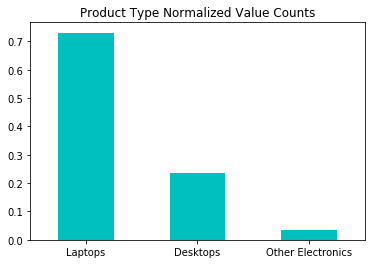

In [106]:
# visulize counts 
df.product_type.value_counts(normalize=True).plot(
                                    kind='bar', 
                                    rot=0, 
                                    title='Product Type Normalized Value Counts',
                                    color='c');

## Ditributions

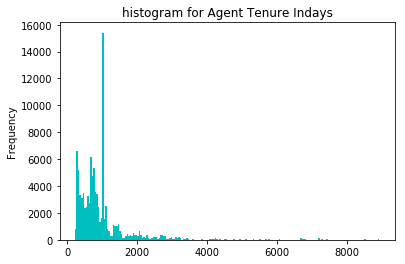

In [113]:
# use hist to create histogram
df.agent_tenure_indays.plot(kind='hist', title='histogram for Agent Tenure Indays', color='c', bins=200);

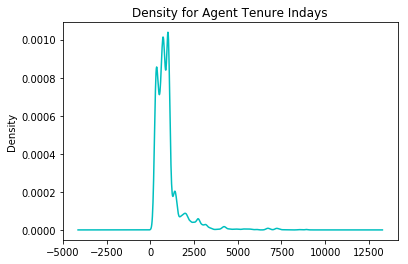

In [117]:
# Use Kernel Density Estimate plot using Gaussian kernels
df.agent_tenure_indays.plot(kind='kde', title='Density for Agent Tenure Indays', color='c');

In [118]:
# print skewnes
print('skewness for Agent Tenure Indays: {0:2f}'.format(df.agent_tenure_indays.skew()))
# print('skewness for Agent Tenure Indays: {0:2f}'.format(df.Fare.skew()))

skewness for Agent Tenure Indays: 3.936917


## Scatter Plots

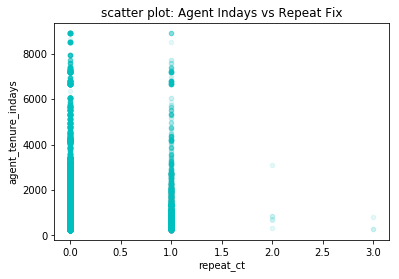

In [122]:
# Scatter plot for bi-variate distribution 
df.plot.scatter(y='agent_tenure_indays', 
                x='repeat_ct', 
                color='c', 
                title='scatter plot: Agent Indays vs Repeat Fix',
                alpha=0.1);

## Grouping and Aggregations

In [126]:
# group by and aggregate 
df.groupby('product_type').repeat_ct.mean()

product_type
Desktops             0.057625
Laptops              0.079820
Other Electronics    0.065524
Name: repeat_ct, dtype: float64

In [132]:
# group by 
df.groupby(['product_type'])['repeat_ct', 'parts_ct'].median()

,repeat_ct,parts_ct
product_type,,
Desktops,0,0
Laptops,0,1
Other Electronics,0,1


In [133]:
# more group by
df.groupby(['product_type']).agg({
    'repeat_ct':'mean',
    'parts_ct': 'median'
})

,repeat_ct,parts_ct
product_type,,
Desktops,0.057625,0
Laptops,0.079820,1
Other Electronics,0.065524,1


In [136]:
# more complex aggregations

aggregations = {
    'repeat_ct': {
        'mean_repeat':'mean',
        'median_repeat':'median',
        'max_repeat':max,
        'min_repeat':np.min
    },
    'parts_ct':{
        'meian_parts':'median',
        'min_parts':min,
        'max_parts':max,
        'range_parts':lambda x: max(x)-min(x)
    }
}

In [137]:
# apply 
df.groupby(['product_type']).agg(aggregations)

C:\Users\Adam\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


repeat_ct                                        parts_ct  \
                  mean_repeat median_repeat max_repeat min_repeat meian_parts   
product_type                                                                    
Desktops             0.057625             0          1          0           0   
Laptops              0.079820             0          3          0           1   
Other Electronics    0.065524             0          1          0           1   

                                                   
                  min_parts max_parts range_parts  
product_type                                       
Desktops                  0        13          13  
Laptops                   0        51          51  
Other Electronics         0        12          12

In [139]:
pd.DataFrame(df.groupby(['product_type', 'repair_type']).agent_tenure_indays.median())

agent_tenure_indays
product_type      repair_type                     
Desktops          Hard                       781.0
                  Soft                       730.0
Laptops           Hard                       879.0
                  Soft                       746.0
Other Electronics Hard                      1018.0
                  Soft                       807.0

## Crosstab

In [140]:
# crosstab on product_type and repair_type
pd.crosstab(df.product_type, df.repair_type)

repair_type,Hard,Soft
product_type,,
Desktops,11554,12047
Laptops,45897,27155
Other Electronics,2043,1284


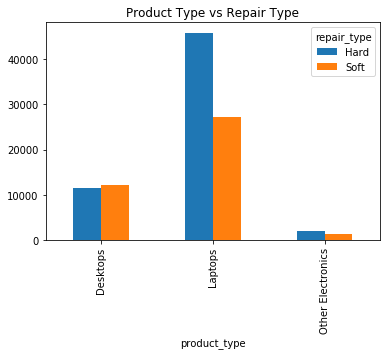

In [143]:
# plot crosstab
pd.crosstab(df.product_type, df.repair_type).plot(kind='bar', title='Product Type vs Repair Type');

## Pivot Table

In [144]:
# pivot table
df.pivot_table(index='product_type', columns='repair_type', values='agent_tenure_indays', aggfunc='mean')

repair_type,Hard,Soft
product_type,,
Desktops,989.081530,953.430386
Laptops,1014.190884,941.681244
Other Electronics,1089.007342,1022.232087


In [145]:
df.groupby(['product_type', 'repair_type']).agent_tenure_indays.mean().unstack()

repair_type,Hard,Soft
product_type,,
Desktops,989.081530,953.430386
Laptops,1014.190884,941.681244
Other Electronics,1089.007342,1022.232087
